In [44]:
# IM Wisconsin 2024 Analysis - 9/15/24

# At this point I have extracted the data and have it in a CSV file.
# I will now read the data and start to analyze it.


In [45]:
# pip install requests beautifulsoup4 pandas


In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from math import radians, cos, sin, asin, sqrt
import json
import os
from pandas import DataFrame, Series

import numpy as np


In [47]:
# Load the data from the CSV file
im_data = pd.read_csv("im_wisconsin_2024_results_raw.csv")

# Display the first few rows of the DataFrame
im_data.head()


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
0,46,Michael Jackson,United States,Male,M50-54,99999,99999,99999,5209,832,99999,99999,99999,99999,DNF
1,630,Yann Gellot,United States,Male,M50-54,99999,99999,99999,5545,1015,32667,1288,99999,99999,DNF
2,81,Joana Roberts,United States,Female,F40-44,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNF
3,1166,Leo Buzalsky,United States,Male,M40-44,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNF
4,1206,Marnie Pearsall,United States,Female,F55-59,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNS


In [48]:
# Check the data types of each column
im_data.dtypes


Bib               int64
Name             object
Country          object
Gender           object
Division         object
Division Rank     int64
Overall Time      int64
Overall Rank      int64
Swim Time         int64
Swim Rank         int64
Bike Time         int64
Bike Rank         int64
Run Time          int64
Run Rank          int64
Finish Status    object
dtype: object

In [49]:
# Check for missing values in the DataFrame
im_data.isnull().sum()


Bib              0
Name             0
Country          0
Gender           0
Division         0
Division Rank    0
Overall Time     0
Overall Rank     0
Swim Time        0
Swim Rank        0
Bike Time        0
Bike Rank        0
Run Time         0
Run Rank         0
Finish Status    0
dtype: int64

In [50]:
# Check for duplicate rows in the DataFrame
im_data.duplicated().sum()


0

In [51]:
# Drop duplicate rows from the DataFrame
im_data.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
im_data.shape


(1389, 15)

In [52]:
# Check the unique values in the "Finish Status" column
im_data["Finish Status"].unique()

# DNF = Did Not Finish
# DNS = Did Not Start
# NC = No Card or Not Classified
# DQ = Disqualified
# FIN = Finished


array(['DNF', 'DNS', 'NC', 'DQ', 'FIN'], dtype=object)

In [53]:
# Let's look at just people who finished the race.
# We can do this in 2 ways: the query method, or boolean indexing.

# Query method
# Assuming im_data is your DataFrame
filtered_df = im_data.query("`Finish Status` == 'FIN'")

# Display the filtered DataFrame
filtered_df


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
195,482,Alfredo Ramirez Pinho,United States,Male,M35-39,1,32423,1,3559,29,17083,1,11307,4,FIN
196,206,Matt Jackson,United States,Male,M30-34,1,32804,2,3449,17,17998,5,10930,2,FIN
197,118,Duncan Chedburn,United Kingdom,Male,M35-39,2,33290,3,3485,22,18091,7,11163,3,FIN
198,1272,Brian Arnold,United States,Male,M30-34,2,34070,4,3672,51,17997,4,11950,8,FIN
199,306,Kyle Martinelli,United States,Male,M30-34,3,34201,5,3770,73,17253,2,12697,23,FIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,567,Tim Valdes,United States,Male,M50-54,123,60835,1190,5650,1061,29440,1174,24129,1174,FIN
1385,236,Matt Fisher,United States,Male,M40-44,107,60922,1191,6366,1246,29757,1192,23199,1119,FIN
1386,722,Erin Huff,United States,Female,F35-39,30,60928,1192,6655,1285,30025,1211,23107,1112,FIN
1387,748,Angela Lisowski,United States,Female,F60-64,8,60993,1193,6284,1232,29953,1209,23489,1137,FIN


In [54]:
# Or can use boolean indexing

# Assuming im_data is your DataFrame
filtered_df = im_data[im_data['Finish Status'] == 'FIN']

# Display the filtered DataFrame
filtered_df


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
195,482,Alfredo Ramirez Pinho,United States,Male,M35-39,1,32423,1,3559,29,17083,1,11307,4,FIN
196,206,Matt Jackson,United States,Male,M30-34,1,32804,2,3449,17,17998,5,10930,2,FIN
197,118,Duncan Chedburn,United Kingdom,Male,M35-39,2,33290,3,3485,22,18091,7,11163,3,FIN
198,1272,Brian Arnold,United States,Male,M30-34,2,34070,4,3672,51,17997,4,11950,8,FIN
199,306,Kyle Martinelli,United States,Male,M30-34,3,34201,5,3770,73,17253,2,12697,23,FIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,567,Tim Valdes,United States,Male,M50-54,123,60835,1190,5650,1061,29440,1174,24129,1174,FIN
1385,236,Matt Fisher,United States,Male,M40-44,107,60922,1191,6366,1246,29757,1192,23199,1119,FIN
1386,722,Erin Huff,United States,Female,F35-39,30,60928,1192,6655,1285,30025,1211,23107,1112,FIN
1387,748,Angela Lisowski,United States,Female,F60-64,8,60993,1193,6284,1232,29953,1209,23489,1137,FIN


In [55]:
# What percentage of people finished their Ironman?

len(filtered_df) / len(im_data) * 100


85.96112311015118

In [56]:
# # Convert 'time_in_seconds' to a timestamp (timedelta format)
# filtered_df['Overall Time'] = pd.to_timedelta(filtered_df['Overall Time'], unit='s')

# filtered_df.head()


### Maybe I don't want to do this. I want to keep the time in seconds for now.


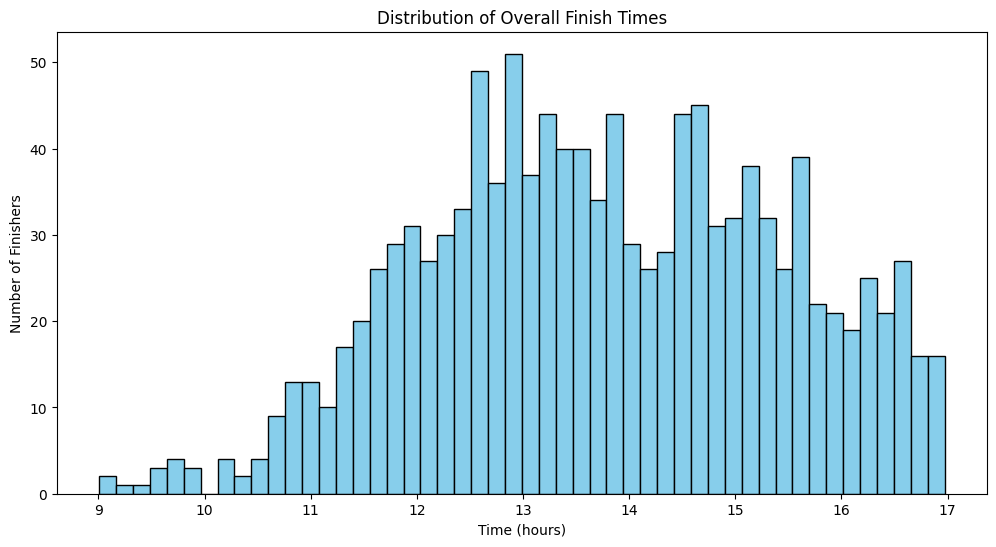

,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status
195,482,Alfredo Ramirez Pinho,United States,Male,M35-39,1,32423,1,3559,29,17083,1,11307,4,FIN
196,206,Matt Jackson,United States,Male,M30-34,1,32804,2,3449,17,17998,5,10930,2,FIN
197,118,Duncan Chedburn,United Kingdom,Male,M35-39,2,33290,3,3485,22,18091,7,11163,3,FIN
198,1272,Brian Arnold,United States,Male,M30-34,2,34070,4,3672,51,17997,4,11950,8,FIN
199,306,Kyle Martinelli,United States,Male,M30-34,3,34201,5,3770,73,17253,2,12697,23,FIN


In [57]:
# Let's look at the distribution of finish times for all finishers in the dataset. 
# Note: I went back and changed to have the 'Overall Time' column be in seconds again.

# Plot a histogram of the overall finish times
plt.figure(figsize=(12, 6))
# plt.hist(filtered_df['Overall Time'].dt.total_seconds() / 3600, bins=50, color='skyblue', edgecolor='black')
plt.hist(filtered_df['Overall Time'] / 3600, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Finish Times')
plt.xlabel('Time (hours)')
plt.ylabel('Number of Finishers')
plt.show()

# Display the DataFrame with the converted time format
filtered_df.head()


In [58]:
# We can assume the data is normally distributed, and calculate the mean and standard deviation.

# Calculate the mean and standard deviation of the finish times
mean_finish_time = filtered_df["Overall Time"].mean()
mean_finish_time = pd.to_timedelta(mean_finish_time, unit='s')

std_finish_time = filtered_df["Overall Time"].std()
std_finish_time = pd.to_timedelta(std_finish_time, unit='s')

mean_finish_time, std_finish_time


(Timedelta('0 days 13:45:57.495812395'),
 Timedelta('0 days 01:39:11.277507693'))

In [59]:
# Let's pull some simple statistics from the filtered df.

# Calculate the median finish time
median_finish_time = filtered_df["Overall Time"].median()
median_finish_time = pd.to_timedelta(median_finish_time, unit='s')

# Calculate the fastest finish time
fastest_finish_time = filtered_df["Overall Time"].min()
fastest_finish_time = pd.to_timedelta(fastest_finish_time, unit='s')

# Calculate the slowest finish time
slowest_finish_time = filtered_df["Overall Time"].max()
slowest_finish_time = pd.to_timedelta(slowest_finish_time, unit='s')

median_finish_time, fastest_finish_time, slowest_finish_time



(Timedelta('0 days 13:42:17.500000'),
 Timedelta('0 days 09:00:23'),
 Timedelta('0 days 16:58:22'))

In [60]:
# Let's look at the distribution of finish times for each age group.

# Group the data by 'Age Group' and calculate the mean finish time for each group
age_group_mean_finish_time = filtered_df.groupby('Division')['Overall Time'].mean()
age_group_mean_finish_time = pd.to_timedelta(age_group_mean_finish_time, unit='s')

# Group the data by 'Age Group' and calculate the standard deviation of finish times for each group
age_group_std_finish_time = filtered_df.groupby('Division')['Overall Time'].std()
age_group_std_finish_time = pd.to_timedelta(age_group_std_finish_time, unit='s')

# Display the mean and standard deviation of finish times for each age group
age_group_mean_finish_time, age_group_std_finish_time



(Division
 F18-24   0 days 14:12:52.526315789
 F25-29   0 days 14:02:05.131578947
 F30-34   0 days 13:35:26.871794872
 F35-39   0 days 13:54:02.166666667
 F40-44   0 days 13:59:39.315789474
 F45-49   0 days 14:01:13.146341463
 F50-54   0 days 14:37:38.230769231
 F55-59             0 days 15:07:40
 F60-64      0 days 15:06:30.750000
 F65-69             0 days 15:06:55
 FPC/ID      0 days 16:29:56.500000
 M18-24      0 days 13:29:00.190000
 M25-29   0 days 13:29:37.779310345
 M30-34   0 days 13:09:15.983193277
 M35-39   0 days 13:32:08.770491803
 M40-44   0 days 13:33:36.476635514
 M45-49   0 days 13:51:35.049504950
 M50-54   0 days 13:55:02.235772358
 M55-59   0 days 14:10:34.779661017
 M60-64   0 days 14:22:12.947368421
 M65-69             0 days 14:16:33
 M70-74             0 days 14:47:18
 M75-79             0 days 16:51:51
 MPC/ID   0 days 13:32:04.333333333
 Name: Overall Time, dtype: timedelta64[ns],
 Division
 F18-24   0 days 01:14:56.051716888
 F25-29   0 days 01:26:54.096118559

In [61]:
# Let me try and calculate in what percentile my finishing time was out of just finishers.
# I was Bib 326.
# This would be percentile for people who finished.

# Get my finish time
my_finish_time = filtered_df[filtered_df['Bib'] == 326]['Overall Time'].values[0]
my_finish_time = pd.to_timedelta(my_finish_time, unit='s')

# Calculate the percentile of my finish time
percentile = (filtered_df['Overall Time'] < my_finish_time.total_seconds()).sum() / len(filtered_df) * 100

my_finish_time, percentile


(Timedelta('0 days 13:53:05'), 53.517587939698494)

In [62]:
# Let me calculate my finishing time percentile for all racers, not just finishers.

# Calculate the percentile of my finish time for all racers
percentile_all = (im_data['Overall Time'] < my_finish_time.total_seconds()).sum() / len(im_data) * 100

percentile_all


46.00431965442765

In [65]:
# Let me calculate what percentile I was in for swim rank, bike rank, and run rank.

# Get my swim rank
my_swim_rank = filtered_df[filtered_df['Bib'] == 326]['Swim Rank'].values[0]

# Calculate the percentile of my swim rank
percentile_swim_rank = (filtered_df['Swim Rank'] < my_swim_rank).sum() / len(filtered_df) * 100

# Get my bike rank
my_bike_rank = filtered_df[filtered_df['Bib'] == 326]['Bike Rank'].values[0]

# Calculate the percentile of my bike rank
percentile_bike_rank = (filtered_df['Bike Rank'] < my_bike_rank).sum() / len(filtered_df) * 100

# Get my run rank
my_run_rank = filtered_df[filtered_df['Bib'] == 326]['Run Rank'].values[0]

# Calculate the percentile of my run rank
percentile_run_rank = (filtered_df['Run Rank'] < my_run_rank).sum() / len(filtered_df) * 100

my_swim_rank, percentile_swim_rank, my_bike_rank, percentile_bike_rank, my_run_rank, percentile_run_rank


(631, 50.9212730318258, 898, 73.36683417085426, 371, 30.82077051926298)

In [67]:
# What would my bike time need to be to be in the top 50% of bike times?

# Calculate the 50th percentile of bike times
percentile_50th_bike_time = np.percentile(filtered_df['Bike Time'], 50)

# Convert to timedelta format
percentile_50th_bike_time = pd.to_timedelta(percentile_50th_bike_time, unit='s')

percentile_50th_bike_time


Timedelta('0 days 06:49:17.500000')

In [68]:
# How many miles per hour would I have to average to get that bike time
# if the course if 112 miles?

# Calculate the average speed required to achieve the 50th percentile bike time
average_speed = 112 / (percentile_50th_bike_time.total_seconds() / 3600)

average_speed


16.41860938613458